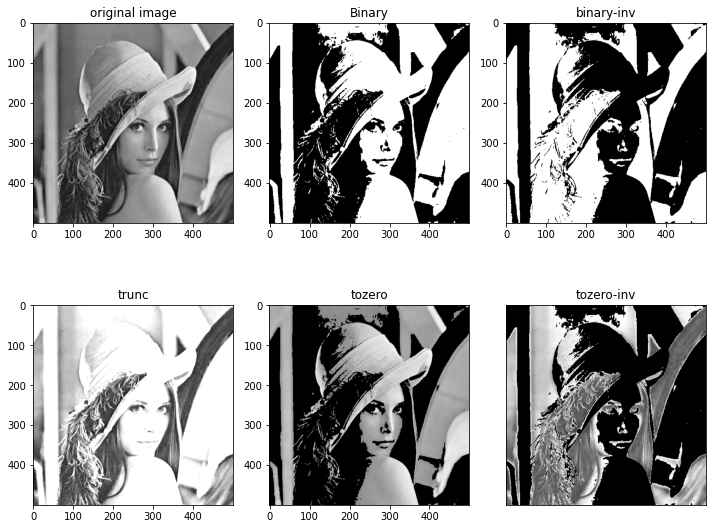

In [16]:
'''
大津法（OTSU）是一种确定图像二值化分割阈值的算法，按照大津法求得的阈值进行图像二值化分割后，前景与背景图像的类间方差最大。属于全局阈值法
方差是灰度分布均匀性的一种度量,背景和前景之间的类间方差越大,说明构成图像的两部分的差别越大,当部分前景错分为背景或部分背景错分为前景都会导致两部分差别变小。
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 将灰度图img2gray中灰度值小于175的点置0，灰度值大于175的点置255
img = cv2.imread('./lena.jpg',0)
ret , thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 大于阈值的部分像素值变为最大值，其他变为0
ret , thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) # 大于阈值的部分变为0，其他部分变为最大值
ret , thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) # 大于阈值的部分变为阈值，其余部分不变
ret , thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) # 大于阈值的部分不变，其余部分变为0
ret , thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) #大于阈值的部分变为0，其余部分不变

# 展示图片
plt.figure(figsize=(10, 8))
plt.subplot(2,3,1),plt.imshow(img,'gray'),plt.title('original image')
plt.subplot(2,3,2),plt.imshow(thresh1,'gray'),plt.title('Binary')
plt.subplot(2,3,3),plt.imshow(thresh2,'gray'),plt.title('binary-inv')
plt.subplot(2,3,4),plt.imshow(thresh3,'gray'),plt.title('trunc')
plt.subplot(2,3,5),plt.imshow(thresh4,'gray'),plt.title('tozero')
plt.subplot(2,3,6),plt.imshow(thresh5,'gray'),plt.title('tozero-inv')
plt.xticks([]),plt.yticks([])
plt.tight_layout()  # 行列紧凑

plt.show()


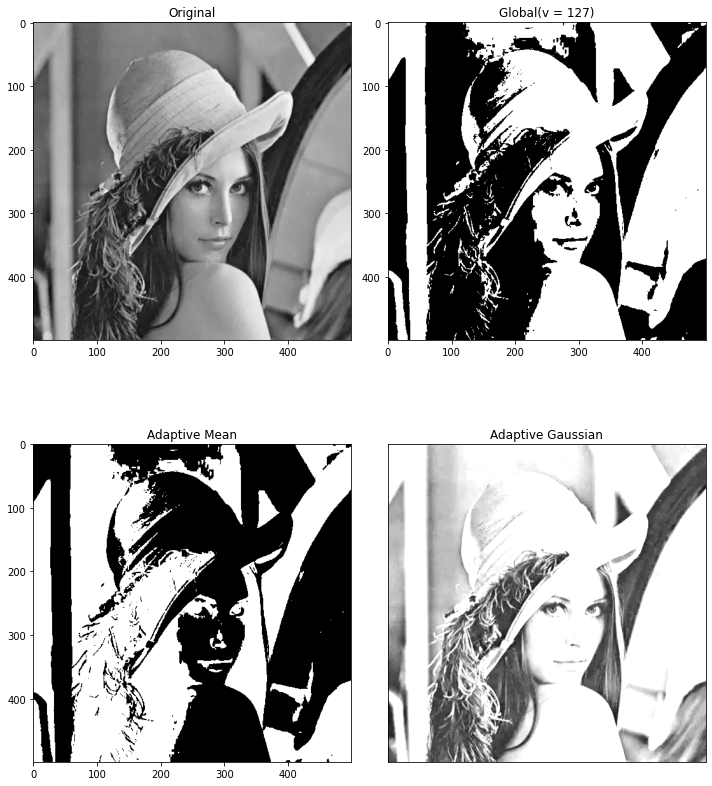

In [13]:
'''
自适应阈值法(adaptiveThreshold)，它的思想不是计算全局图像的阈值，而是根据图像不同区域亮度分布，计算其局部阈值.
对于图像不同区域，能够自适应计算不同的阈值，因此被称为自适应阈值法。(局部阈值法)
'''
# 自适应阈值与固定阈值对比
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./lena.jpg', 0) # 原灰度图

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # 固定阈值  灰度值小于175的点置0，灰度值大于175的点置255
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4) # 自适应阈值 blockSize=11 常数c=4
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4) # 高斯加权自适应对比
# 全局阈值，均值自适应，高斯加权自适应对比

# 展示图片
plt.figure(figsize=(10, 12))
plt.subplot(2,2,1),plt.imshow(img,'gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(thresh1,'gray'),plt.title('Global(v = 127)')
plt.subplot(2,2,3),plt.imshow(thresh2,'gray'),plt.title('Adaptive Mean')
plt.subplot(2,2,4),plt.imshow(thresh3,'gray'),plt.title('Adaptive Gaussian')
plt.xticks([]),plt.yticks([])
plt.tight_layout()  # 行列紧凑

plt.show()
